In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
prop0 = pd.read_csv('../data/prop0.csv')
prop4 = pd.read_csv('../data/prop4.csv')

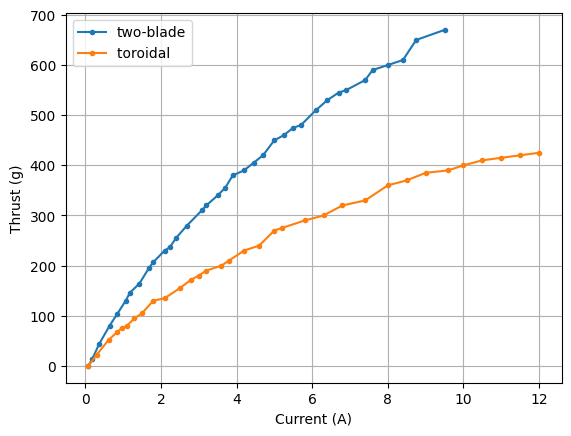

In [3]:
plt.plot(prop0['i'], prop0['T'], label='two-blade', marker='.')
plt.plot(prop4['i'], prop4['T'], label='toroidal ', marker='.')
plt.xlabel('Current (A)')
plt.ylabel('Thrust (g)')
plt.legend()
plt.grid()
# plt.title('Thrust vs Current for the different types of propellers')
plt.savefig('thrust.pdf')

two-blade: m=-0.09466036227274079, b=131.73512717822936
toroidal: m=-0.10720103022506021, b=81.50685529015368


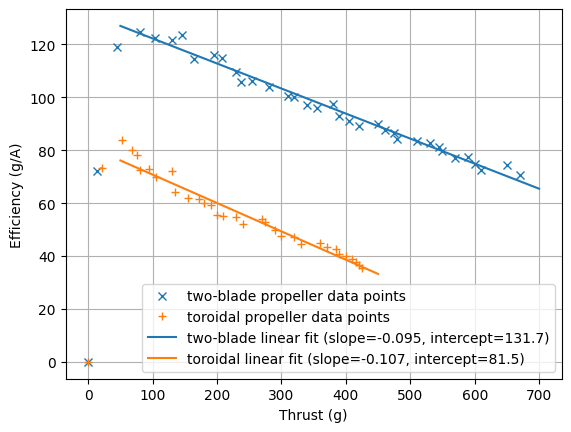

In [4]:
plt.plot(prop0['T'], prop0['T']/prop0['i'], label='two-blade propeller data points', marker='x', linestyle="None")
plt.plot(prop4['T'], prop4['T']/prop4['i'], label='toroidal propeller data points', marker='+',  linestyle="None")
plt.xlabel('Thrust (g)')
plt.ylabel('Efficiency (g/A)')
# plt.title('Efficiency vs Thrust for the different types of propellers')

# fit the data to straight line
s = slice(3, None, None)  # start, stop, step
m0, c0 = np.polyfit(prop0['T'][s], prop0['T'][s]/prop0['i'][s], 1)
m4, c4 = np.polyfit(prop4['T'][s], prop4['T'][s]/prop4['i'][s], 1)
print(f'two-blade: m={m0}, b={c0}')
print(f'toroidal: m={m4}, b={c4}')

x0 = np.linspace(50, 700, 10)
plt.plot(x0, m0*x0+c0, color='tab:blue', label=f'two-blade linear fit (slope={m0:.3f}, intercept={c0:.1f})')
x4 = np.linspace(50, 450, 10)
plt.plot(x4, m4*x4+c4, color='tab:orange', label=f'toroidal linear fit (slope={m4:.3f}, intercept={c4:.1f})')

plt.legend()
plt.grid()
plt.savefig('efficiency.pdf')